<div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=5>
<div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=5>
    <div align=center>
        <font face="IranNastaliq" size=30>
            <p></p>
            به نام خدا
        </font>
    <br>
    </div>
<hr/>
<font color=#43a8a5 size=6>
    <p></p>
    <br />
    <div align=center>
    مسئله رگرسیون خطی با رویکرد احتمالاتی
    </div>
</font>
<br />
<hr />
<style type="text/css" scoped>
p{
border: 1px solid #a2a9b1;background-color: #f8f9fa;display: inline-block;
};
</style>

<div>
<h3> فهرست محتویات</h3>
<ul style="margin-right: 0;">
<li><a href="#section1"> مقدمه </a></li>
<li><a href="#section2"> تعریف مسئله</a></li>
<li><a href="#section3">رگرسیون خطی</a></li>
<li><a href="#section4">بدست آوردن پارامتر‌های رگرسیون خطی</a></li>
<li><a href="#section5">روش کمترین مربعات</a></li>
<li><a href="#section6">پیاده‌سازی در پایتون</a></li>
<li><a href="#section7">خلاصه و نتیجه‌گیری</a></li>
</ul>
</div>

<div id="section1" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<font color=#FF7500 size=6>
مقدمه
        </font>
		<p></p>
		<hr>
        فرض کنید شما به تازگی در یک بنگاه املاک مشغول به کار شده‌اید و وظیفه شما قیمت‌گذاری بر روی خانه‌هایی است که به تازگی به بنگاه شما سپرده شده‌اند. شما برای قیمت‌گذاری بر روی یک مسکن که به شما واگزار شده است، ابتدا به ویژگی‌هایی مانند مساحت خانه، سال ساخت خانه، میانه درآمد مردم ساکن در آن منطقه،  موقعیت ملک و ... توجه می‌کنید اما این ویژگی‌ها به تنهایی برای قیمت گذاشتن بر خانه کافی نیستند. اطلاعات دیگری که شما به آن احتیاج دارید در دفتر ثبت قراردادها قرار دارد که شامل ویژگی‌های خانه‌های خرید و فروش شده و قیمت آن‌ها است. حال کاری که احتمالا شما انجام می‌دهید این است که سعی می‌کنید رابطه‌ای بین ویژگی‌های خانه‌های ثبت شده و قیمت آن‌ها که داده‌های ما در این مسئله هستند،  پیدا کنید. در این دفترچه قصد داریم مدل احتمالاتی را معرفی کنیم که در حل کردن این مسئله به ما کمک می‌کند.
        <br/>
<img src="source/pic1.png" style="float:center; width:60%"/>
<br />
</font>
</div>

<div id="section2" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<font color=#FF7500 size=6>
تعریف مسئله
        </font>
		<p></p>
		<hr>
         در این قسمت سعی داریم که مسئله گفته شده را به صورت یک مدل ریاضی بیان کنیم. ویژگی‌های مختلف خانه را در نظر بگیرید. در این قسمت مساحت، سال ساخت و میانه درآمد منطقه را به عنوان ویژگی‌های اصلی در نظر می‌گیریم و سعی می‌کنیم رابطه آن با قیمت خانه را مدل کنیم. سه ویژگی خانه بیان شده به صورت اعداد حقیقی قابل بیان هستند در نتیجه می‌توان بردار زیر را به عنوان بردار ویژگی یک خانه در نظر گرفت:
       $$
            \pmb{x} = \begin{bmatrix}
                x^{(1)} : Area\\
                x^{(2)} : House's \;age\\
                x^{(3)} : Median\; income\\
            \end{bmatrix} \in X = \mathbb{R}^3
       $$
قیمت هر خانه را به صورت برچسب بر روی هر بردار در مجموعه $X$
در نظر می‌گیریم و در نهایت داده‌هایی که از مسئله داریم به صورت مجموعه‌ی زیر قابل بیان خواهد بود:
$$ y = Value\; of\; house \in Y = \mathbb{R}$$
$$\mathcal{D} = \{(\pmb{x}_1, y_1), (\pmb{x}_2, y_2), \cdots, (\pmb{x}_N, y_{N})\}\;( gathered \;data) $$
حال ما در این مسئله به دنبال تابعی مانند 
$f$
با پارامتر
$\pmb{w}$
از 
$X$
به 
$Y$ 
هستیم
که بتواند رابطه‌ی بین ویژگی‌های خانه‌ها و قیمت آن‌ها را به خوبی مدل کند.
$$\begin{cases}
    f : X \rightarrow Y\\
    y_i \simeq f(\pmb{x}_i;\pmb{w})\\
\end{cases}$$
دقت کنید که ما تخمینی از قیمت را  با استفاده از تابع
$f$ 
بدست می‌آوریم که ممکن است با مقدار واقعی آن در داده‌ی جمع‌آوری شده متفاوت باشد. این عدم قطعیت یا مقدار خطایی را که بر روی تخمین قیمت هر 
$\pmb{x}_i$
داریم، به صورت متغیر تصادفی 
$\epsilon$
در رابطه وارد می‌کنیم.
$$y_i = f(\pmb{x}_i;\pmb{w}) + \epsilon_i$$
تصویر زیر می‌تواند در فهم بهتر موضوع کمک کند:
</br>
<img src="source/pic2.png" style="float:center; width:60%"/>
</br>
<br>
توضیح شکل:
<br>
همانطور که از شکل مشخص است تابع f(x;w) در هر نقطه برابر با قیمت واقعی آن یعنی yi  نشده است و در هر نقطه به اندازه‌ی یک مقدار تصادفی
با مقدار تخمینی که زده‌ایم دارای خطا یا عدم قطعیت هستیم.
</font>
</div>

<div id="section3" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<font color=#FF7500 size=6>
رگرسیون خطی
        </font>
		<p></p>
		<hr>
در مسئله رگرسیون خطی مدل خود یعنی
        f(x; w)
        را اینگونه در نظر می‌گیریم که با ویژگی‌های 
        مسئله که میانه درآمد آن منطقه، مساحت و سن ساختمان بودند، رابطه خطی داشته باشد.
        به عبارت دیگر تخمین قیمتی که از روی ویژگی‌های خانه می‌زنیم به صورت جمع وزن‌دار از ویژگی‌ها باشد؛ بدین صورت که هر ویژگی‌ای که نقش پررنگ‌تری داشت، ضریب بزرگتری بدست می‌آورد.
        <br>
            در نتیجه تابع f(x; w) 
        به صورت زیر بیان می‌شود:
        $$f(\pmb{x}; \pmb{w}) = w_0 + w_1x^{(1)} + w_2x^{(2)} + w_3x^{(3)}$$
دقت کنید که مقادیر $w_0, w_1, w_2, w_3$
همان پارامتر‌های مسئله می‌باشند که با بردار
$\pmb{w} = \begin{bmatrix}w_0 & w_1& w_2& w_3\end{bmatrix}^T$
در $f(\pmb{x}; \pmb{w})$
مشخص شده‌اند.
حال با توجه به رابطه بالا برای مقادیر $y_i$ خواهیم داشت:
$$y_i = \underbrace{w_0 + w_1x^{(1)}_i + w_2x^{(2)}_i + w_3x^{(3)}_i}_{f(\pmb{x}_i;\pmb{w})} + \epsilon_i$$
تنها چیزی که همچنان در رابطه‌ای که ارائه کرده‌ایم مبهم است، متغیر تصادفی $\epsilon_i$ است که مقدار عدم قطعیت تخمین  را در هر نقطه مدل می‌کند. برای این متغیر تصادفی می‌توانیم تابع‌های توزیع احتمال گوناگونی در نظر بگیریم که به نتایج متخلفی می‌انجامد اما در مسئله رگرسیون خطی این متغیر تصادفی را با تابع توزیع نرمال با میانگین صفر و واریانیس $\sigma^2$  در هر نقطه ($\epsilon_i \sim \mathcal{N}(0, \sigma^2) $) مدل می‌کنیم که در نتیجه خواهیم داشت:
$$y_i = f(\pmb{x}_i; \pmb{w}) + \mathcal{N}(0, \sigma^2)$$
رابطه‌ی بالا، رابطه‌ی نهایی است که برای مدل خود ارائه می‌دهیم و در قسمت‌های بعد سعی می‌کنیم که پارامتر‌های آن یعنی 
$w_0, w_1, w_2, w_3, \sigma^2$
را طوری پیدا کنیم که بتواند داده‌ی ما را به خوبی مدل کند اما پیش از آن لازم است نگاه دقیق‌تری به رابطه‌ی بیان شده  بیندازیم. اگر از رابطه‌ی بالا امید ریاضی بگیریم، خواهیم داشت:
$$\mathbb{E}[y_i|\pmb{x}_i] = \mathbb{E}[f(\pmb{x}_i; \pmb{w}) + \mathcal{N}(0, \sigma^2)] = \mathbb{E}[f(\pmb{x}_i; \pmb{w})] + \underbrace{\mathbb{E}[\mathcal{N}(0, \sigma^2)]}_{0} = f(\pmb{x}_i; \pmb{w})$$
دقت کنید که هر قیمت به ازای ویژگی‌های داده شده تعریف می‌شود، به همین دلیل امید ریاضی شرطی گرفته‌ایم. با توجه به رابطه‌ی بالا
می‌توان گفت که مدل ما ($f(\pmb{x}_i; \pmb{w})$)
سعی دارد که میانگین قیمت‌ها به ازای بردار ویژگی داده شده را بدست آورد که این مقدار با مقدار قیمت واقعی متفاوت است. حال اینکه مقدار واریانس $\sigma^2$ سعی دارد مقدار عدم قطعیت ما را روی تخمین زده شده بیان کند. 
<br>
پس
می‌توان مقدار قیمت بر اساس ویژگی داده شده را به صورت تابع احتمالاتی زیر بیان کرد:
$$p(y_i|\pmb{x}_i,\pmb{w}, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp\{-\frac{1}{2\sigma^2}(y_i - f(\pmb{x}_i; \pmb{w}))^2\}$$
تصویر زیر می‌تواند در فهم بهتر موضوع کمک کند:
</br>
<img src="source/pic3.png" style="float:center; width:65%"/>
</br>
<br>
توضیح شکل:
<br>
نمودار قرمز رنگ، نمودار تابع f پس از پیدا کردن پارامتر w آن است(در قسمت‌های بعد توضیح داد خواهد شد).
تخمین قیمت یک خانه با بردار ویژگی x0
برابر خواهد بود با f(x0; w)
که همانطور که در شکل مشخص است، عدم قطعیت در  تخمین آن با توزیع نرمال حول مقدار f(x0; w)
مدل شده است. به عبارت دیگر تخمین قیمت برابر خواهد بود با نمونه‌گیری از یک توزیع نرمال با میانگین f(x0; w)
که هر چقدر مقدار واریانس آن کمتر باشد، توزیع حول مقدار f(x0; w)
جمع‌تر شده و قطعیت در تخمین ما بیش ‌تر خواهد شد.
</font>
</div>

<div id="section4" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<font color=#FF7500 size=6>
بدست آوردن پارامتر‌های رگرسیون خطی
        </font>
		<p></p>
		<hr>
برای بدست آوردن پارامتر‌های تابع احتمالاتی‌ای که در بالا مطرح کردیم 
  ، ابتدا مقدار likelihood را با فرض اینکه 
        $(\pmb{x}_i, y_i)$
        ها i.i.d هستند که فرض معقولی است تشکیل می‌دهیم:
        $$p(\mathcal{D}|\pmb{w}, \sigma^2) = p(\pmb{Y}|\pmb{X}, \pmb{w}, \sigma^2) = p(y_1, \cdots, y_N|\pmb{x}_1,\cdots, \pmb{x}_N, \pmb{w}, \sigma^2) = \prod_{i=1}^{N}p(y_i|\pmb{x}_i,\pmb{w}, \sigma^2)$$
 عبارت بالا بیان می‌کند که چقدر احتمال دارد که با پارامتر‌های $\pmb{w}, \sigma^2$ برای مدل، 
 داده‌هایی که از مسئله داریم یعنی $(\pmb{x}_1, y_1), \cdots, (\pmb{x}_N, y_N)$، اتفاق بیفتد.
 در نتیجه ما باید به دنبال $\pmb{\hat{w}}, \hat{\sigma}^2$‌ای باشیم که این احتمال یعنی $p(\mathcal{D}|\pmb{w}, \sigma^2)$ را بیشینه کند و در نهایت آن‌ها را به عنوان پارامتر‌های بدست آمده برای مدل گزارش کنیم.
 ابتدا سعی می‌کنیم که بردار $\pmb{\hat{w}}$ را بدست آوریم و سپس با طریق مشابه $\hat{\sigma}^2$ را پیدا می‌کنیم.
 $$\pmb{\hat{w}} = \arg\max_{\pmb{w}} p(\mathcal{D}|\pmb{w}, \sigma^2) = \arg\max_{\pmb{w}} \prod_{i=1}^{N}p(y_i|\pmb{x}_i,\pmb{w}, \sigma^2)$$
 همانطور که در رابطه‌ی بالا مشخص است ما به دنبال بیشینه کردن ضرب چندین احتمال هستیم که این حاصل ضرب مقادیر بسیار کوچکی به خود می‌گیرد. برای رفع این مشکل مقدار $\log$ احتمال likelihood را بیشینه می‌کنیم و چون تابع $\log$ تابعی صعودی است، جواب بهینه را تغییر نمی‌دهد. در نتیجه خواهیم داشت:
 $$\pmb{\hat{w}} = \arg\max_{\pmb{w}} \ln p(\mathcal{D}|\pmb{w}, \sigma^2) = \arg\max_{\pmb{w}} \ln\prod_{i=1}^{N}p(y_i|\pmb{x}_i,\pmb{w}, \sigma^2) = \arg\max_{\pmb{w}} \sum_{i=1}^{N}\ln p(y_i|\pmb{x}_i,\pmb{w}, \sigma^2) $$
 $$= \arg\max_{\pmb{w}} \sum_{i=1}^{N}\ln (\frac{1}{\sqrt{2\pi\sigma^2}}\exp\{-\frac{1}{2\sigma^2}(y_i - f(\pmb{x}_i; \pmb{w}))^2\})$$
 $$=\arg\max_{\pmb{w}} -N\ln\sigma - \frac{N}{2}\ln2\pi - \frac{1}{2\sigma^2}\underbrace{\sum_{i=1}^{N}(y_i - f(\pmb{x}_i;\pmb{w}))^2}_{sum \;of\; square \;errors}$$
همان طور که در روابط بالا اثبات کردیم، بیشینه کردن مقدار likelihood معادل است با کمینه کردن مجموع مربعات     اختلاف بین تخمین ما و مقدار واقعی قیمت که از آن به عنوان روش کمترین مربعات یاد می‌شود و به دلیل اهیمت آن در قسمت بعد به آن خواهیم پرداخت (پیش از ادامه این بخش، روش کمترین مربعات را مطالعه کنید).
<br>
برای بدست آوردن مقدار واریانس در هر نقطه کافی است که احتمال likelihood را برای پارامتر $\sigma^2$ تشکیل دهیم و مقدار آن را بیشینه کنیم. همانند روابط قبل داریم:
$$\hat{\sigma}^2 = \arg\max_{\sigma^2}\ln p(\mathcal{D}|\pmb{w}, \sigma^2) = \arg\max_{\sigma^2} \sum_{i=1}^{N}\ln p(y_i|\pmb{x}_i,\pmb{w}, \sigma^2)$$
$$= \arg\max_{\sigma^2} \underbrace{-N\ln\sigma - \frac{N}{2}\ln2\pi - \frac{1}{2\sigma^2}\sum_{i=1}^{N}(y_i - f(\pmb{x}_i;\pmb{w}))^2}_{g(D;\pmb{w},\sigma^2)} = \arg\max_{\sigma^2} g(D;\pmb{w}, \sigma^2)$$
تابع $g$ در نقطه بیشینه خود دارای مشتق صفر است، در نتیجه می‌توان با صفر قرار دادن مشتق پاره‌ای $g$ نسبت به $\sigma^2$ و با توجه به بردار $\pmb{\hat{w}}$ای که با استفاده از روش کمترین مربعات بدست آوردیم مقدار پارامتر $\sigma^2$ را پیدا کنیم.
$$\frac{\partial{g(D;\pmb{w}, \sigma^2)}}{\partial{\sigma^2}} = 0 \implies \hat{\sigma}^2 = \frac{1}{N}\sum_{i=1}^{N}(y_i - f(\pmb{x}_i; \pmb{\hat{w}}))^2$$
$$=\frac{1}{N}\sum_{i=1}^{N}(y_i - \hat{w}_0 - \hat{w}_1x_i^{(1)}-\hat{w}_2x_i^{(2)}-\hat{w}_3x_i^{(3)})^2$$
واریانسی که در بالا بدست آوردیم بیان‌کننده متوسط خطاای است که بر روی هر نمونه داشته‌ایم. به عبارت دیگر عدم قطعیت ما در تخمین قیمت واقعی هر نمونه برابر است با میانگین خطای مدل ما بر روی کل داده.
</font>
</div>

<div id="section5" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<font color=#FF7500 size=6>
روش کمترین مربعات
        </font>
		<p></p>
		<hr>
        یکی از روش‌های مرسوم برای پیدا کردن پارامتر‌های یک مدل، یافتن مقادیری است که به ازای آن کمترین مجموع خطا را بر روی داده‌ها داشته باشیم. با توجه به بخش قبل داریم:
        $$L(\pmb{w}) = \sum_{i=1}^{N}(y_i - f(\pmb{x}_i;\pmb{w}))^2 = \sum_{i=1}^{N}(y_i - w_0 - w_1x_i^{(1)}- w_2x_i^{(2)}- w_3x_i^{(3)})^2$$
تابع $L$ که تابعی از $w_0, w_1, w_2, w_3$ است را قصد داریم کمینه کنیم.
می‌دانیم در نقطه‌ی کمینه این تابع مقدار مشتق تابع نسبت به متغیرهایش برابر صفر است. پس مشتق پاره‌ای این تابع نبست به $w_0, w_1, w_2, w_3$ را برابر با صفر قرار داده و با حل دستگاه معادلات، پارامتر‌های مسئله را پیدا می‌کنیم:
$$\begin{align*}
& \frac{\partial L}{\partial w_0} = 0 \implies\sum_{i=1}^{N}-2(y_i - w_0 - w_1x_i^{(1)}- w_2x_i^{(2)}- w_3x_i^{(3)}) = 0 \quad (i)\\
& \frac{\partial L}{\partial w_1} = 0 \implies\sum_{i=1}^{N}-2x_i^{(1)}(y_i - w_0 - w_1x_i^{(1)}- w_2x_i^{(2)}- w_3x_i^{(3)}) = 0 \quad (ii)\\
& \frac{\partial L}{\partial w_2} = 0 \implies\sum_{i=1}^{N}-2x_i^{(2)}(y_i - w_0 - w_1x_i^{(1)}- w_2x_i^{(2)}- w_3x_i^{(3)}) = 0 \quad (iii)\\
& \frac{\partial L}{\partial w_3} = 0 \implies\sum_{i=1}^{N}-2x_i^{(3)}(y_i - w_0 - w_1x_i^{(1)}- w_2x_i^{(2)}- w_3x_i^{(3)}) = 0 \quad (iv)\\
\end{align*}$$
با حل ۴ معادله ۴ مجهول معادلات بالا مقادیر $\hat{w}_0, \hat{w}_1, \hat{w}_2, \hat{w}_3$ و در نتیجه بردار $\pmb{\hat{w}} = [\hat{w}_0\;\hat{w}_1\;\hat{w}_2\;\hat{w}_3]^T$ مدلی که ارائه کرده بودیم، بدست خواهد آمد. برای فهم بهتر معادلات و حل آن به مثال زیر توجه کنید.
<div dir="rtl">
    <font face="XB Zar" color=#1E25EC size = 6>
       مثال
    </font>
    </div>
    <hr>
    فرض کنید داده‌های جمع‌آوری شده بر اساس دو ویژگی به صورت زیر باشد:
    $$\mathcal{D} = \big\{\big((1,2), 2\big), \big((3,1), 4\big), \big((2,2), 1\big),\big((5,6), 11\big)\big\}$$
قصد داریم داده‌ی بالا را با استفاده از رابطه‌ی بیان شده‌ی زیر که در آن $\epsilon \sim \mathcal{N}(0, \sigma^2)$ مدل کنیم.  
$$y = \alpha_0 + \alpha_1x^{(1)} + \alpha_2x^{(2)} + \epsilon$$
پارامتر‌های مدل بیان شده که شامل $\alpha_0,\alpha_1,\alpha_2, \sigma^2$ را بیابید.
<div dir="rtl">
    <font face="XB Zar" color=#1E25EC size = 6>
       حل.
    </font>
    </div>
    <hr>
   ابتدا باید تابع خطا را با استفاده از روش کمترین مربعات تشکیل دهیم:
   $$L(\alpha_0,\alpha_1,\alpha_2) = \sum_{i=1}^{4}(y_i - \alpha_0 - \alpha_1x_i^{(1)} - \alpha_2x_i^{(2)})^2 = (2 - \alpha_0 - \alpha_1 - 2\alpha_2)^2 + (4 - \alpha_0 - 3\alpha_1 - \alpha_2)^2 + (1 - \alpha_0 - 2\alpha_1 - 2\alpha_2)^2 + (11 - \alpha_0 - 5\alpha_1 - 6\alpha_2)^2$$
حال کافی است $\alpha_0,\alpha_1,\alpha_2$ای را پیدا کنیم که تابع خطا را کمینه کند که این کار را با صفر قرار دادن مشتقات پاره‌ای انجام دادیم:
$$\begin{align*}
&\frac{\partial L}{\partial \alpha_0} = 0 \implies 4\alpha_0 + 11\alpha_1 + 11\alpha_2 = 18\\
&\frac{\partial L}{\partial \alpha_1} = 0 \implies 11\alpha_0 + 39\alpha_1 + 39\alpha_2 = 71\\
&\frac{\partial L}{\partial \alpha_2} = 0 \implies 11\alpha_0 + 39\alpha_1 + 45\alpha_2 = 76\\
\end{align*} \implies \alpha_0 = -2.25,\; \alpha_1 = 1.62,\; \alpha_2 = 0.83$$
حال برای مقدار واریانس داریم:
$$\sigma^2 = \frac{1}{4}\sum_{i=1}^{4}(y_i + 2.25 - 1.62x_i^{(1)} - 0.83x_i^{(2)})^2 = \frac{1}{4}(0.94 + 0.31 + 2.72 + 0.02) = 0.99$$
واریانس کمی که بدست آورده‌ایم نشان‌دهنده این است که رابط بیان‌شده توانسته به خوبی داده‌ی موردنظر را مدل کند.
</font>
</div>

<div id="section6" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<font color=#FF7500 size=6>
پیاده‌سازی در پایتون
        </font>
		<p></p>
		<hr>
        در این بخش قصد داریم مسئله مطرح شده را با استفاده ابزار پایتون حل کنیم.
        تنها تفاوت با قسمت‌های قبل این است که برای اینکه بتوانیم نتیجه نهایی را رسم کنیم، در این جا از یک ویژگی  برای تخمین  استفاده می‌کنیم. در نتیجه رابطه‌ای که خواهیم داشت به شکل زیر است:
        $$y = \beta_0 + \beta_1x$$
در داده‌ای که در اختیار داریم، $y$ برابر است با میانه قیمت‌های خانه در نواحی مختلف
و $x$ برابر است با میانه درآمد افرادی که در ناحیه زندگی می‌کنند.
بر اساس شهود قبلی می‌توان حدس زد که بین این دو متغیر تصادفی باید یک رابطه‌ی خطی وجود داشته باشد. حال قصد داریم این رابطه را کشف کنیم.
<br>
داده زیر را در اختیار داریم:
</font>
</div>

In [1]:
import pandas as pd
data = pd.read_csv("source/houseData.csv")
data.head()

,medianIncome,medianHouseValue
0,2.3026,90.6
1,1.1250,233.3
2,2.4942,186.3
3,1.6467,90.9
4,2.1375,87.5


<div dir = "rtl">
	<font face="XB Zar" size=5>
		<p></p>
        حال با استفاده از ()LinearRegression رابطه‌ی خطی بین ویژگی میانه درآمد و برچسب میانه قیمت خانه را می‌یابیم:
       </font>
</div>

In [3]:
data.medianIncome.values

array([ 2.3026,  1.125 ,  2.4942, ...,  5.0747,  3.3713, 13.1738])

In [2]:
from sklearn.linear_model import LinearRegression
import numpy as np

x = data.medianIncome.values
y = data.medianHouseValue.values

x = x.reshape(len(x),1)
y = y.reshape(len(y),1)
regression_line = LinearRegression().fit(x,y)
print("Estimation of B1 is: "+str(regression_line.coef_[0][0]))
print("Estimation of intercept is: "+str(regression_line.intercept_[0]))

Estimation of B1 is: 41.79384920189622
Estimation of intercept is: 45.08557670326812


<div dir = "rtl">
	<font face="XB Zar" size=5>
        <p></p>
                خروجی کد بالا نشان می‌دهد که مقدار ضریب ویژگی یا همان B1 برابر است با 41.79 و مقدار عرض از مبدا یا همان B0 برابر است با 45.09.
        <br>
            برای درک بهتر و نمایش خطی که بدست آورده‌ایم بر روی داده، با استفاده از کتابخانه matplotlib نمودارها را رسم می‌کنیم.
       </font>
</div>

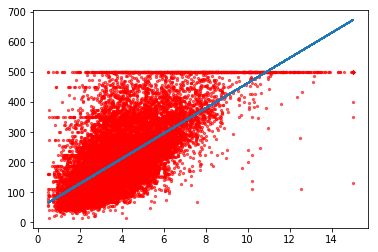

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(data.medianIncome,data.medianHouseValue,color="r",marker = "o",s = 5,alpha=0.6)
plt.plot(x,x*regression_line.coef_[0][0]+regression_line.intercept_[0])
plt.show()

<div dir = "rtl">
	<font face="XB Zar" size=5>
		<p></p>
        همانطور که در نمودار بالا مشاهده می‌شود، خط رسم شده توانسته به مقدار خوبی داده را مدل کند.
       </font>
</div>

<div id="section7" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<font color=#FF7500 size=6>
خلاصه و نتیجه‌گیری
        </font>
		<p></p>
		<hr>
         در این دفترچه با مفاهیم زیر آشنا شدیم:
        <ul>
            <li>
      آشنایی مختصر با مفهوم یادگیری ماشین
           : بدست آوردن تابعی که بتواند داده‌ی ما را توصیف کند.
           </li>
            <li>
            مفهوم رگرسیون خطی 
                : این فرض را به تابع خود اضافه می‌کنیم که داده‌ی موردنظر به صورت خطی نسبت به ویژگی‌ها مدل می‌شود. 
            </li>
                        <li>
             تخمین پارامتر‌ها با  روش Maximum Likelihood
            </li>
                                    <li>
          روش کمترین مربعات
           : در این روش مجموع خطاهای مدل را بدست آورده و سپس سعی می‌کنیم پارامتر‌هایی را برای مسئله پیدا کنیم که این خطا را کمینه می‌کند.
           </li>
            <li>
                پیاده‌سازی رگرسیون خطی با پایتون
                </li>
        </ul>
</font>
</div>

<div id="section7" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<font color=#FF7500 size=6>
منابع
        </font>
		<p></p>
		<hr>
        <ul>
            <li>
            Dr. soleymani, Machine Learning Lecture Notes 2018
            </li>
            <li>
            C. Bishop, “Pattern Recognition and Machine Learning”, Chapter 3.3 
            </li>
                        <li>
              probabilitycourse.com, chapter 8.5
            </li>
                                    <li>
           en.wikipedia.org/wiki/Regression_analysis
            </li>
        </ul>
</font>
</div>